running pair modes
Classified Amount: 100
Unclassified Amount: 0
14 classified as PureLongitudinal
6 classified as FlexuralTorsional
32 classified as x_PureFlexural
32 classified as y_PureFlexural
16 classified as PureTorsional


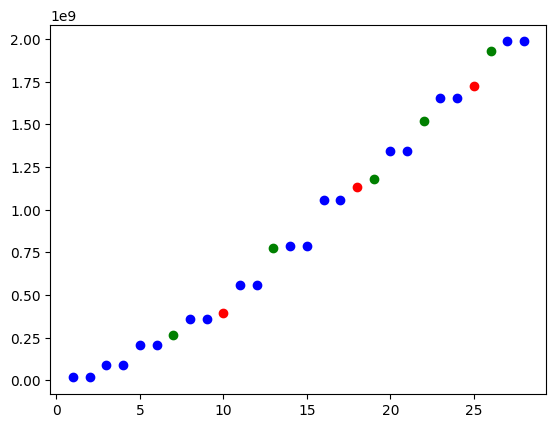

In [5]:
#thick_qd_height
from BeamAnalyzer.comsoloutputsorter import ComsolOutputSorter
from BeamAnalyzer.modeclassifier import ModeClassifier
name = 'thick_qd_height'
test = ComsolOutputSorter()
test.set_attributes(['freq', 'bottom-r_bottom' ,'solid.eZZ', 'solid.eXY', 'solid.eYZ', 'solid.eXZ', 'solid.eXX', 'solid.eYY', 'u', 'v', 'w', 'maxop1(u)','maxop1(v)','maxop1(w)'])
test.load_file(filename=f'{name}.txt')
test.load_file_with_effective_masses(filename='thick_effective_mass.txt')
test.process_data_file()


thick_qd_height = ModeClassifier(test, folder_name=name)
thick_qd_height.line_expression = 'bottom-r_bottom'
thick_qd_height.save_vizu = False
thick_qd_height.visualise_mode_plots = False
thick_qd_height.classify_all_modes()
thick_qd_height.get_list_of_detected_vibrations_present()
#thick_qd_height.print_all_predictions()
# thick_qd_height.plot_pair_relative_error(filename=name + '_relative')
# thick_qd_height.plot_absolute_error_on_angle_from_90(filename=name + '_angle')
# maybe antisymmetry is more legit
thick_qd_height.print_classifications_statistics()
thick_qd_height.export_datasheet()
thick_qd_height.plot_mode_num_and_freq()



running pair modes
Classified Amount: 100
Unclassified Amount: 0
15 classified as PureLongitudinal
9 classified as FlexuralTorsional
32 classified as x_PureFlexural
32 classified as y_PureFlexural
12 classified as PureTorsional


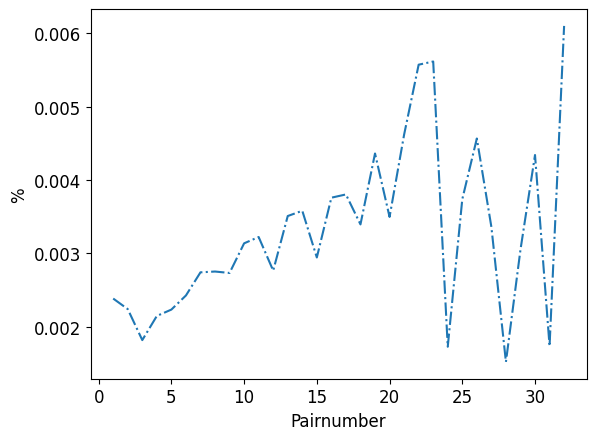

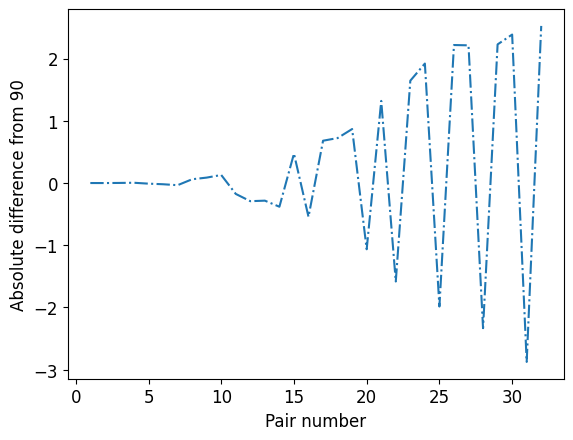

In [34]:
#thick_test_height
name = 'thick_test_height'
test = ComsolOutputSorter()
test.set_attributes(['freq', 'bottom2-r_bottom' ,'solid.eZZ', 'solid.eXX', 'solid.eYY', 'solid.eXY', 'solid.eYZ', 'solid.eXZ', 'u', 'v', 'w', 'maxop1(u)','maxop1(v)','maxop1(w)'])
test.load_file(filename=f'{name}.txt')
test.load_file_with_effective_masses(filename='thick_effective_mass.txt')
test.process_data_file()

thick_test_height = ModeClassifier(test, folder_name=name)
thick_test_height.line_expression = 'bottom2-r_bottom'
thick_test_height.save_vizu = False
thick_test_height.visualise_mode_plots = True
thick_test_height.classify_all_modes()

thick_test_height.get_list_of_detected_vibrations_present()
#thick_test_height.print_all_predictions()
thick_qd_height.plot_pair_relative_error(filename='thick_test_height' + '_rel')
thick_qd_height.plot_absolute_error_on_angle_from_90(filename='thick_test_height' + '_abs')
# maybe antisymmetry is more legit
thick_test_height.print_classifications_statistics()

In [35]:
comparison = ClasificationComparer(thick_qd_height, thick_test_height)
comparison.print_where_modes_disagree()

29                   2.2990e+09           PureTorsional        FlexuralTorsional    Disagree
42                   3.4705e+09           PureTorsional        FlexuralTorsional    Disagree
53                   4.6620e+09           FlexuralTorsional    PureTorsional        Disagree
57                   5.0706e+09           PureTorsional        FlexuralTorsional    Disagree
60                   5.4684e+09           PureTorsional        PureLongitudinal     Disagree
75                   7.0673e+09           FlexuralTorsional    PureTorsional        Disagree
81                   7.4761e+09           FlexuralTorsional    PureTorsional        Disagree
89                   7.8718e+09           PureTorsional        FlexuralTorsional    Disagree
94                   8.2762e+09           PureTorsional        FlexuralTorsional    Disagree
100                  8.6836e+09           PureTorsional        FlexuralTorsional    Disagree


running pair modes
Classified Amount: 100
Unclassified Amount: 0
8 classified as PureLongitudinal
12 classified as FlexuralTorsional
40 classified as x_PureFlexural
40 classified as y_PureFlexural
0 classified as PureTorsional


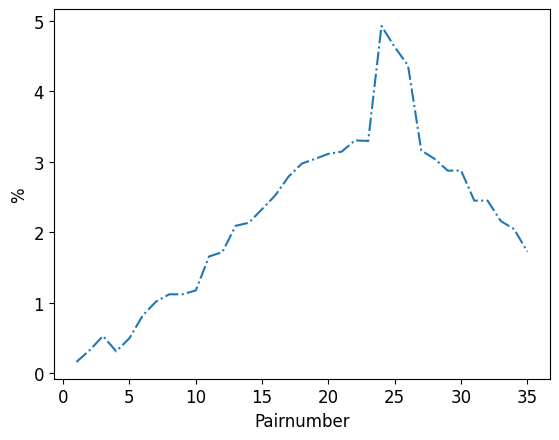

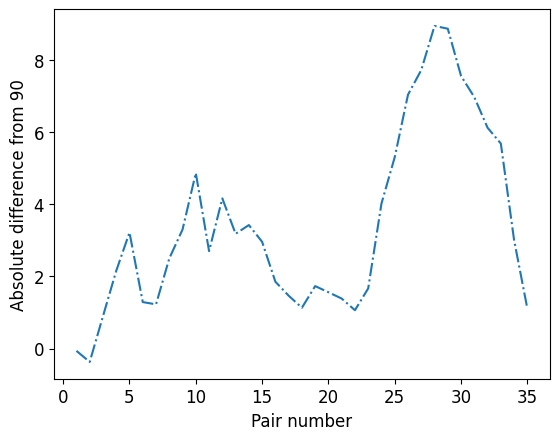

In [36]:
#slender_above
name = 'slender_above'
test = ComsolOutputSorter()
test.set_attributes(['freq', 'bottom2-test_len/2' ,'solid.eZZ', 'solid.eXX', 'solid.eYY', 'solid.eXY', 'solid.eYZ', 'solid.eXZ', 'u', 'v', 'w', 'maxop1(u)','maxop1(v)','maxop1(w)'])
test.load_file(filename=f'{name}.txt')
test.load_file_with_effective_masses(filename='slender_effective_mass.txt')
test.process_data_file()

slender_above = ModeClassifier(test, folder_name=name)
slender_above.line_expression = 'bottom2-test_len/2'
slender_above.save_vizu = False
slender_above.visualise_mode_plots = True
slender_above.classify_all_modes()
slender_above.get_list_of_detected_vibrations_present()
slender_above.plot_pair_relative_error(filename='slender_above' + '_rel')
# slender_above.print_all_predictions()
slender_above.plot_absolute_error_on_angle_from_90(filename='slender_above' + '_abs')
# maybe antisymmetry is more legit
slender_above.print_classifications_statistics()

running pair modes
Classified Amount: 100
Unclassified Amount: 0
8 classified as PureLongitudinal
11 classified as FlexuralTorsional
41 classified as x_PureFlexural
40 classified as y_PureFlexural
0 classified as PureTorsional


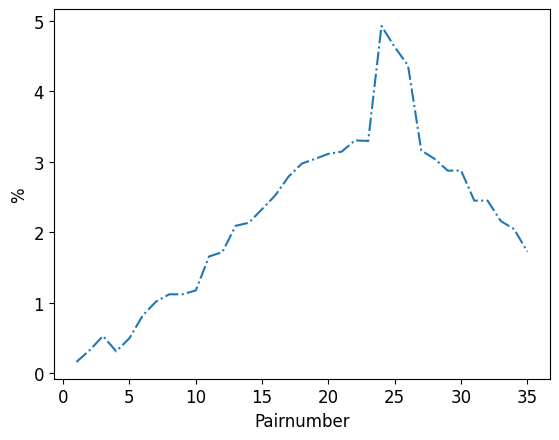

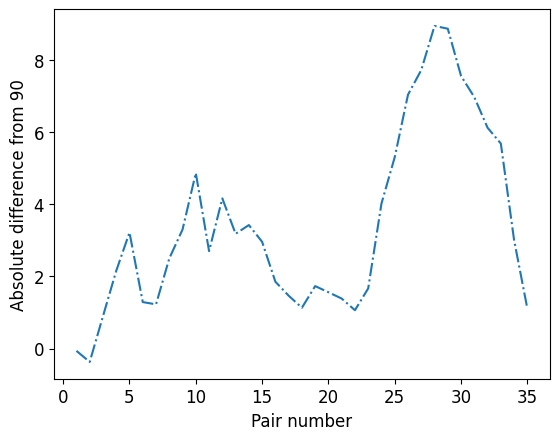

In [37]:
# slender_below Here Qd is
name = 'slender_below'
test = ComsolOutputSorter()
test.set_attributes(['freq', 'bottom-r_bottom' ,'solid.eZZ', 'solid.eXX', 'solid.eYY', 'solid.eXY', 'solid.eYZ', 'solid.eXZ', 'u', 'v', 'w', 'maxop1(u)','maxop1(v)','maxop1(w)'])
test.load_file(filename=f'{name}.txt')
test.load_file_with_effective_masses(filename='slender_effective_mass.txt')
test.process_data_file()


slender_below = ModeClassifier(test, folder_name=name)
slender_below.line_expression = 'bottom-r_bottom'
slender_below.save_vizu = False
slender_below.visualise_mode_plots = True
slender_below.classify_all_modes()

slender_below.get_list_of_detected_vibrations_present()
# slender_below.print_all_predictions()
slender_below.plot_pair_relative_error(filename='thick_test_height' + '_rel')
slender_below.plot_absolute_error_on_angle_from_90(filename='thick_test_height' + '_abs')
slender_below.print_classifications_statistics()
slender_below.export_datasheet()

In [38]:
comparison_slender = ClasificationComparer(slender_below, slender_above)
comparison_slender.print_where_modes_disagree()

97                   1.2086e+09           x_PureFlexural       FlexuralTorsional    Disagree


running pair modes
Classified Amount: 100
Unclassified Amount: 0
8 classified as PureLongitudinal
2 classified as FlexuralTorsional
40 classified as x_PureFlexural
40 classified as y_PureFlexural
10 classified as PureTorsional


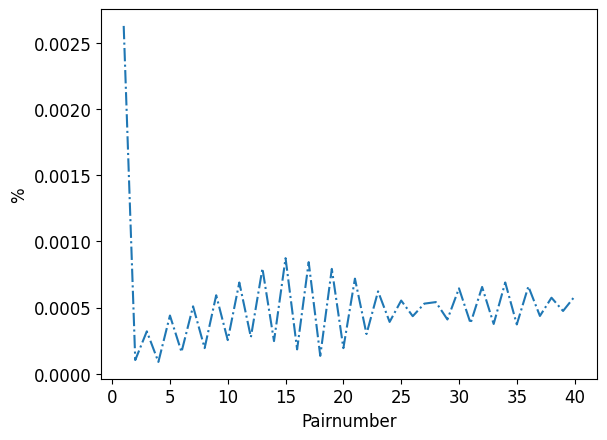

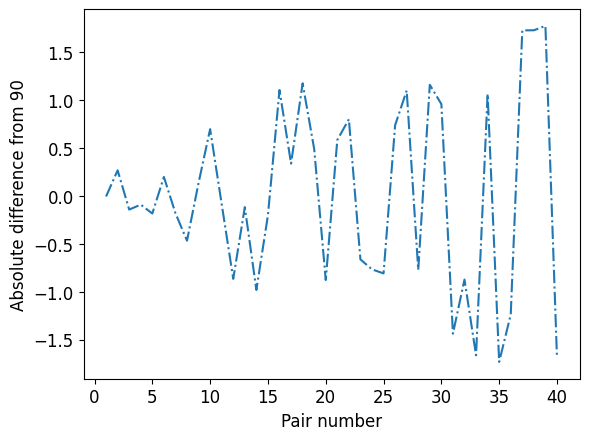

In [39]:
# Hourglas middle
name = 'hourglas_middle'
test = ComsolOutputSorter()
test.set_attributes(['freq', 'middle_line-(d_middle/2)' ,'solid.eZZ', 'solid.eXX', 'solid.eYY', 'solid.eXY', 'solid.eYZ', 'solid.eXZ', 'u', 'v', 'w', 'maxop1(u)','maxop1(v)','maxop1(w)'])
test.load_file(filename=f'{name}.txt')
test.load_file_with_effective_masses(filename='hourglass_effective_mass.txt')
test.process_data_file()



hourglas_middle = ModeClassifier(test, folder_name=name)
hourglas_middle.line_expression = 'middle_line-(d_middle/2)'
hourglas_middle.save_vizu = False
hourglas_middle.visualise_mode_plots = True
hourglas_middle.classify_all_modes()

hourglas_middle.get_list_of_detected_vibrations_present()
# hourglas_middle.print_all_predictions()
hourglas_middle.plot_pair_relative_error(filename='hourglas_middle_rel')
hourglas_middle.plot_absolute_error_on_angle_from_90(filename='hourglas_middle_abs')
hourglas_middle.print_classifications_statistics()
hourglas_middle.export_datasheet()

running pair modes
Classified Amount: 100
Unclassified Amount: 0
8 classified as PureLongitudinal
10 classified as FlexuralTorsional
40 classified as x_PureFlexural
40 classified as y_PureFlexural
2 classified as PureTorsional


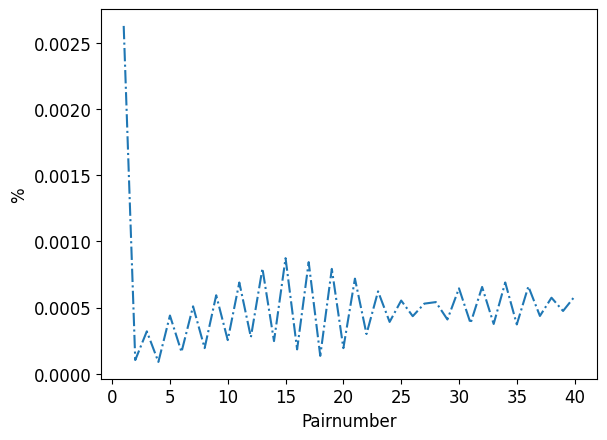

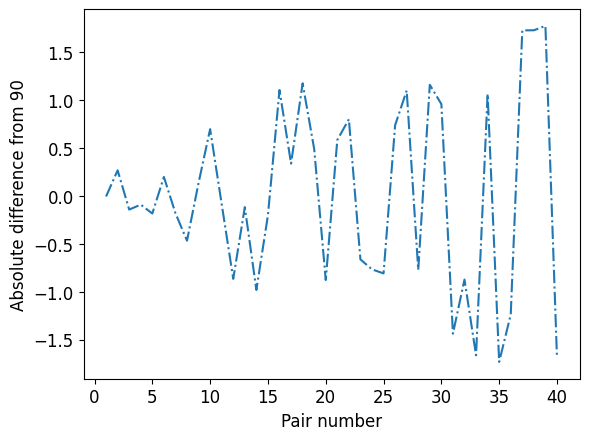

In [40]:
# hourglas_close_to_top
name = 'hourglas_close_to_top'
test = ComsolOutputSorter()
test.set_attributes(['freq', 'bottom-(d_top/2)' ,'solid.eZZ', 'solid.eXY', 'solid.eXX', 'solid.eYY', 'solid.eYZ', 'solid.eXZ', 'u', 'v', 'w', 'maxop1(u)','maxop1(v)','maxop1(w)'])
test.load_file(filename=f'{name}.txt')
test.load_file_with_effective_masses(filename='hourglass_effective_mass.txt')
test.process_data_file()

hourglas_close_to_top = ModeClassifier(test, folder_name=name)
hourglas_close_to_top.line_expression = 'bottom-(d_top/2)'
hourglas_close_to_top.save_vizu = False
hourglas_close_to_top.visualise_mode_plots = True
hourglas_close_to_top.classify_all_modes()

hourglas_close_to_top.get_list_of_detected_vibrations_present()
# hourglas_close_to_top.print_all_predictions()
hourglas_close_to_top.plot_pair_relative_error(filename='hourglas_close_to_top_rel')
hourglas_close_to_top.plot_absolute_error_on_angle_from_90(filename='hourglas_close_to_top_abs')
hourglas_close_to_top.print_classifications_statistics()

In [41]:
comparison_slender = ClasificationComparer(hourglas_middle, hourglas_close_to_top)
comparison_slender.print_where_modes_disagree()

45                   3.9356e+07           PureTorsional        FlexuralTorsional    Disagree
60                   6.2631e+07           PureTorsional        FlexuralTorsional    Disagree
66                   7.5587e+07           PureTorsional        FlexuralTorsional    Disagree
72                   8.5775e+07           PureTorsional        FlexuralTorsional    Disagree
80                   9.7941e+07           PureTorsional        FlexuralTorsional    Disagree
83                   1.0883e+08           PureTorsional        FlexuralTorsional    Disagree
91                   1.2136e+08           PureTorsional        FlexuralTorsional    Disagree
95                   1.3234e+08           PureTorsional        FlexuralTorsional    Disagree


running pair modes
Classified Amount: 100
Unclassified Amount: 0
14 classified as PureLongitudinal
4 classified as FlexuralTorsional
32 classified as x_PureFlexural
32 classified as y_PureFlexural
18 classified as PureTorsional


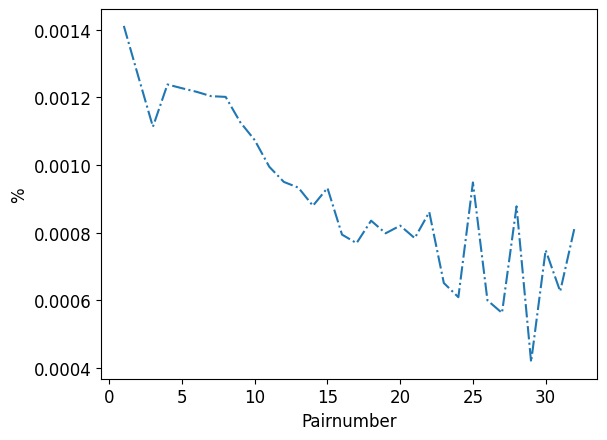

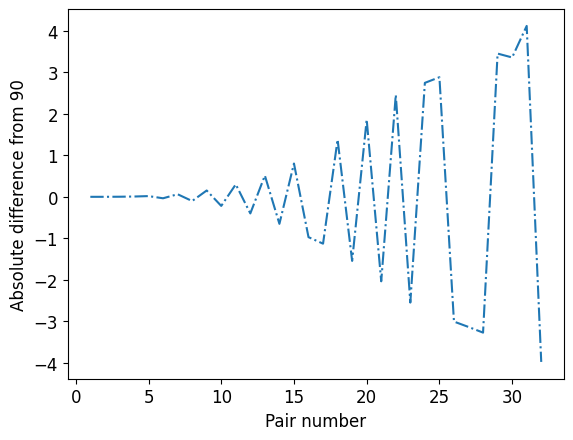

In [42]:
#thick_test_height
name = 'kotal_line'
test = ComsolOutputSorter()
test.set_attributes(['freq', 'bottom-r_bottom' ,'solid.eZZ', 'solid.eXX', 'solid.eYY', 'solid.eXY', 'solid.eYZ', 'solid.eXZ', 'u', 'v', 'w', 'maxop1(u)','maxop1(v)','maxop1(w)'])
test.load_file(filename=f'{name}.txt')
test.load_file_with_effective_masses(filename='kotal_effective_mass.txt')
test.process_data_file()

kotal = ModeClassifier(test, folder_name=name)
kotal.line_expression = 'bottom-r_bottom'
kotal.save_vizu = False
kotal.visualise_mode_plots = True
kotal.classify_all_modes()

kotal.get_list_of_detected_vibrations_present()
#thick_test_height.print_all_predictions()
kotal.plot_pair_relative_error(filename='kotal' + '_rel')
kotal.plot_absolute_error_on_angle_from_90(filename='kotal' + '_abs')
# maybe antisymmetry is more legit
kotal.print_classifications_statistics()
kotal.export_datasheet()

In [43]:
plt.rcParams.update({'font.size': 12})

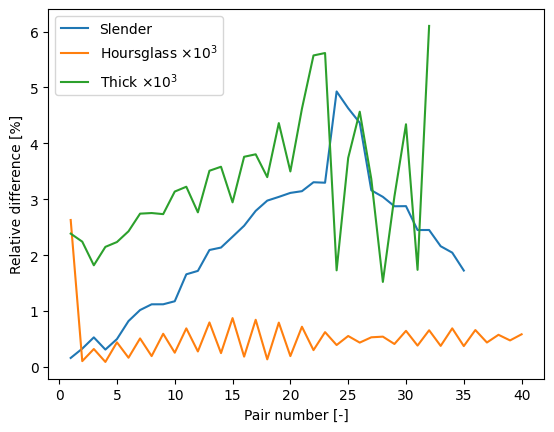

In [82]:
sx, sy = slender_above.get_pairs_relative_error_on_frequency()
hx, hy = hourglas_middle.get_pairs_relative_error_on_frequency()
tx, ty = thick_qd_height.get_pairs_relative_error_on_frequency()

fig, axs = plt.subplots(1,1)
axs.plot(sx,sy, label = 'Slender')
axs.plot(np.asarray(hx),np.asarray(hy)*1000, label = 'Hoursglass $\\times 10^3 $')
axs.plot(np.asarray(tx),np.asarray(ty)*1000, label = 'Thick $\\times 10^3 $')
axs.set_xlabel('Pair number [-]')
axs.set_ylabel('Relative difference [%]')
axs.legend()
fig.savefig(fname='relative_comparison.png', dpi = 450)

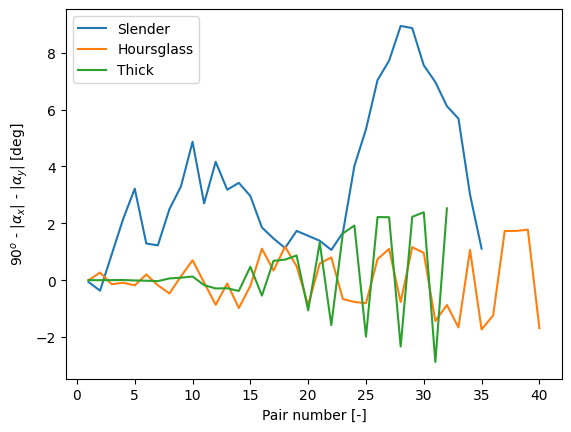

In [83]:
sx, sy = slender_above.get_absolute_errors_on_angle_from_90()
hx, hy = hourglas_middle.get_absolute_errors_on_angle_from_90()
tx, ty = thick_qd_height.get_absolute_errors_on_angle_from_90()

fig, axs = plt.subplots(1,1)
axs.plot(sx,sy, label = 'Slender')
axs.plot(np.asarray(hx),np.asarray(hy), label = 'Hoursglass')
axs.plot(np.asarray(tx),np.asarray(ty), label = 'Thick')
axs.set_xlabel('Pair number [-]')
axs.set_ylabel('90$^o$ - |$\\alpha_x$| - |$\\alpha_y$| [deg]')
axs.legend()
fig.savefig(fname='angle_comparison.png', dpi = 450)

In [104]:
"c_PureFlexural" in ["x_PureFlexural", "y_PureFlexural"]

False

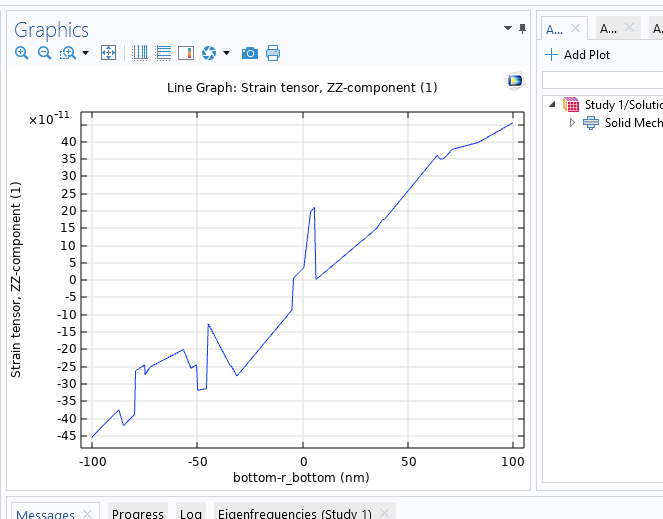

In [12]:
#Torsional?


In [13]:
# long mode

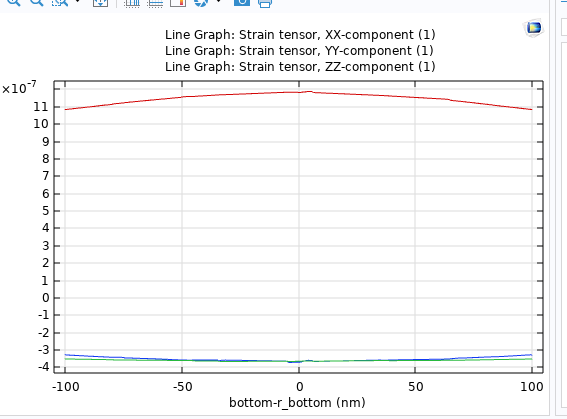


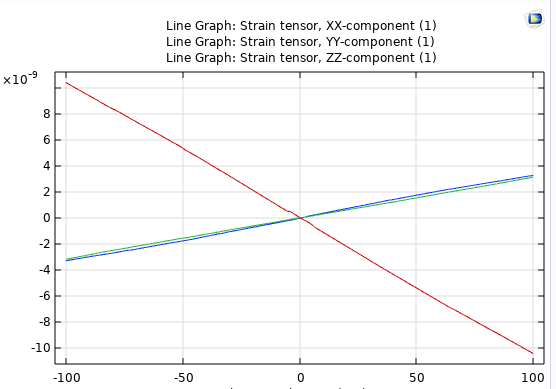
flex

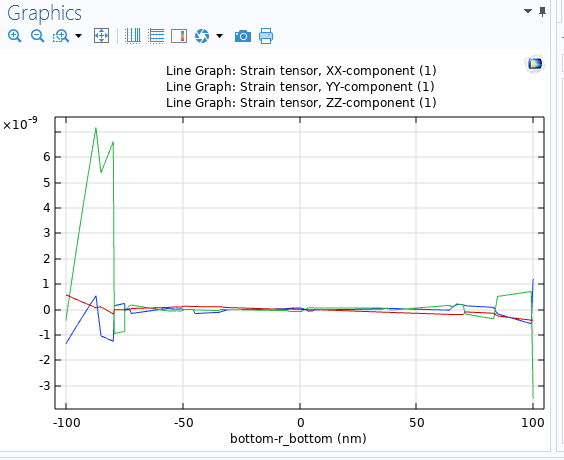
# and a torsional

Now these are VERY DISTINGUISHABLE
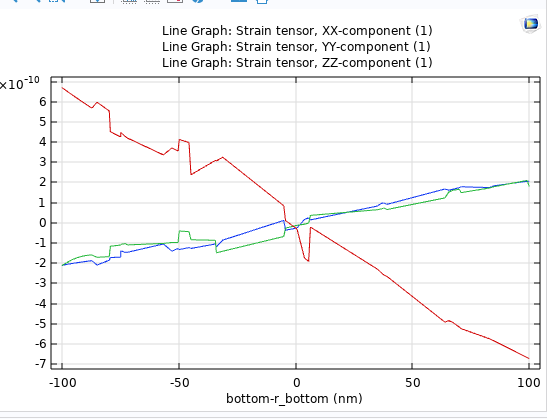
This one was doubtful, but is proably just a flex mode

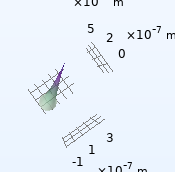

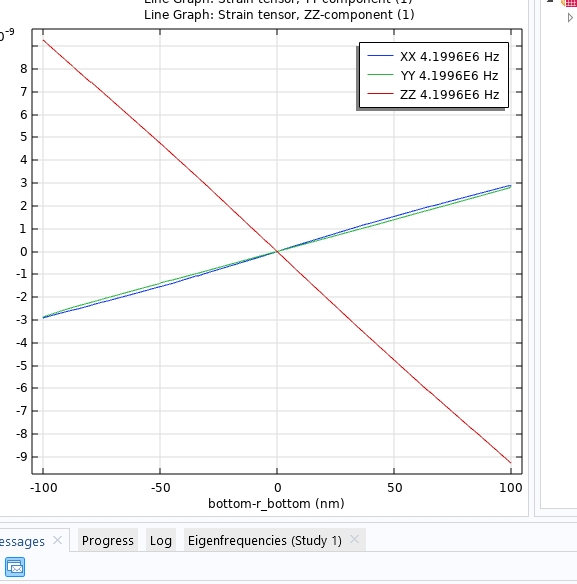

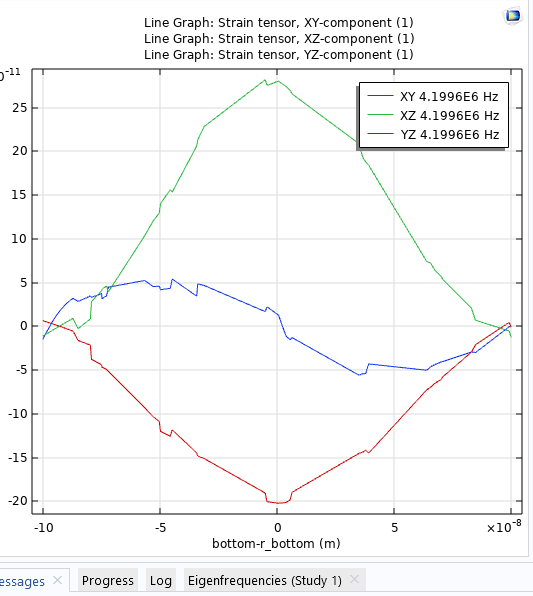

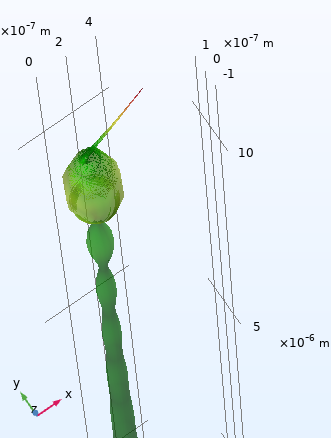
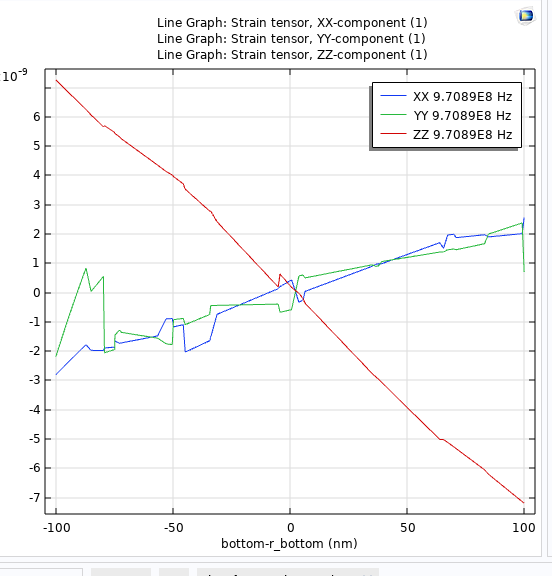
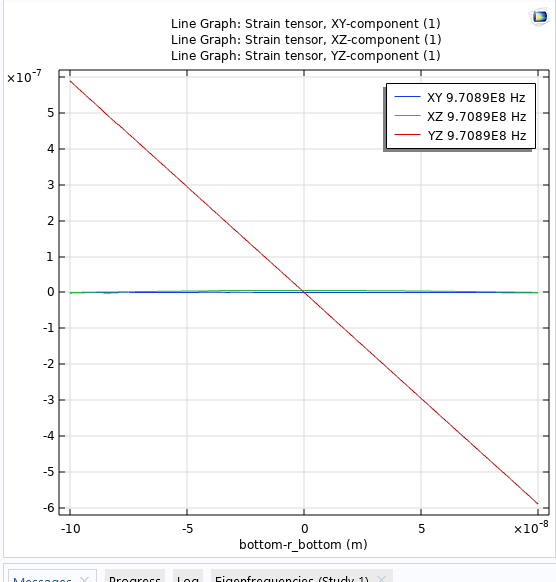


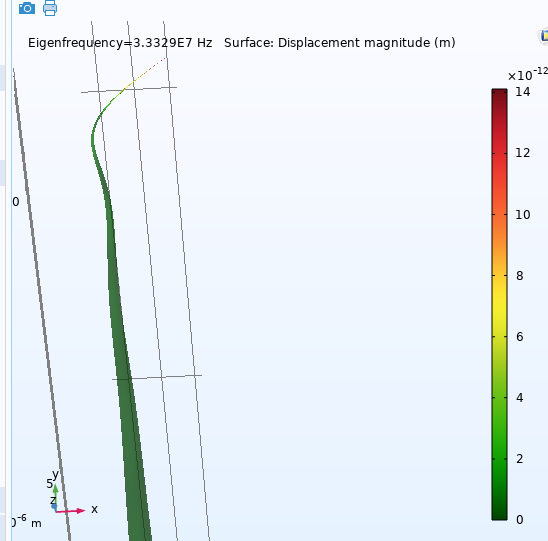
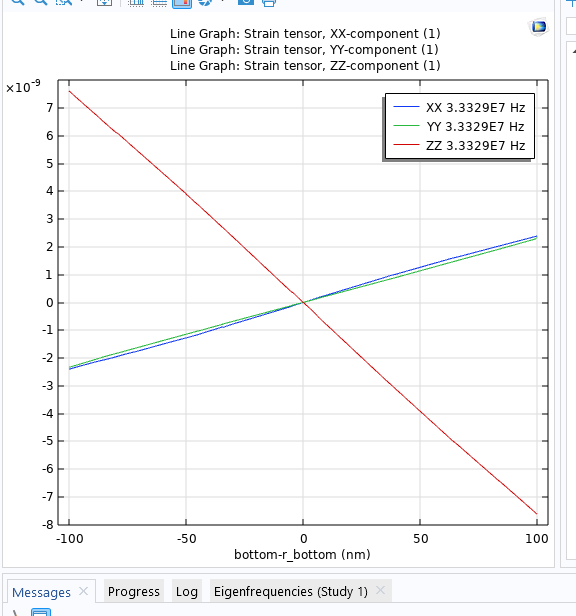
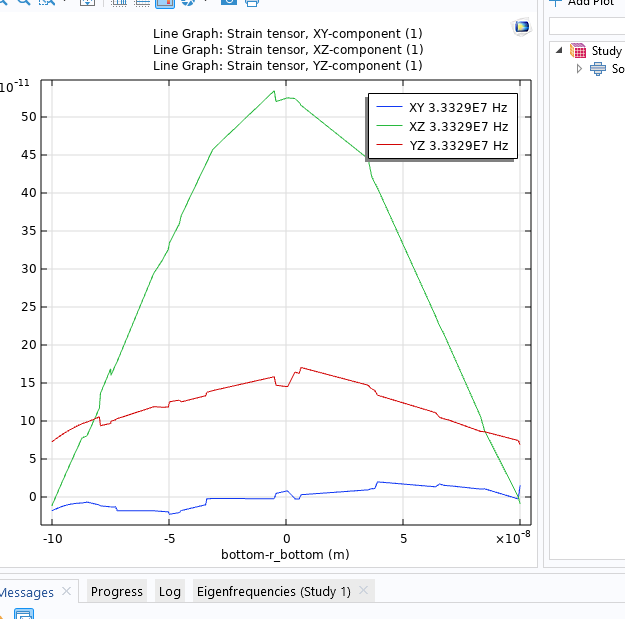



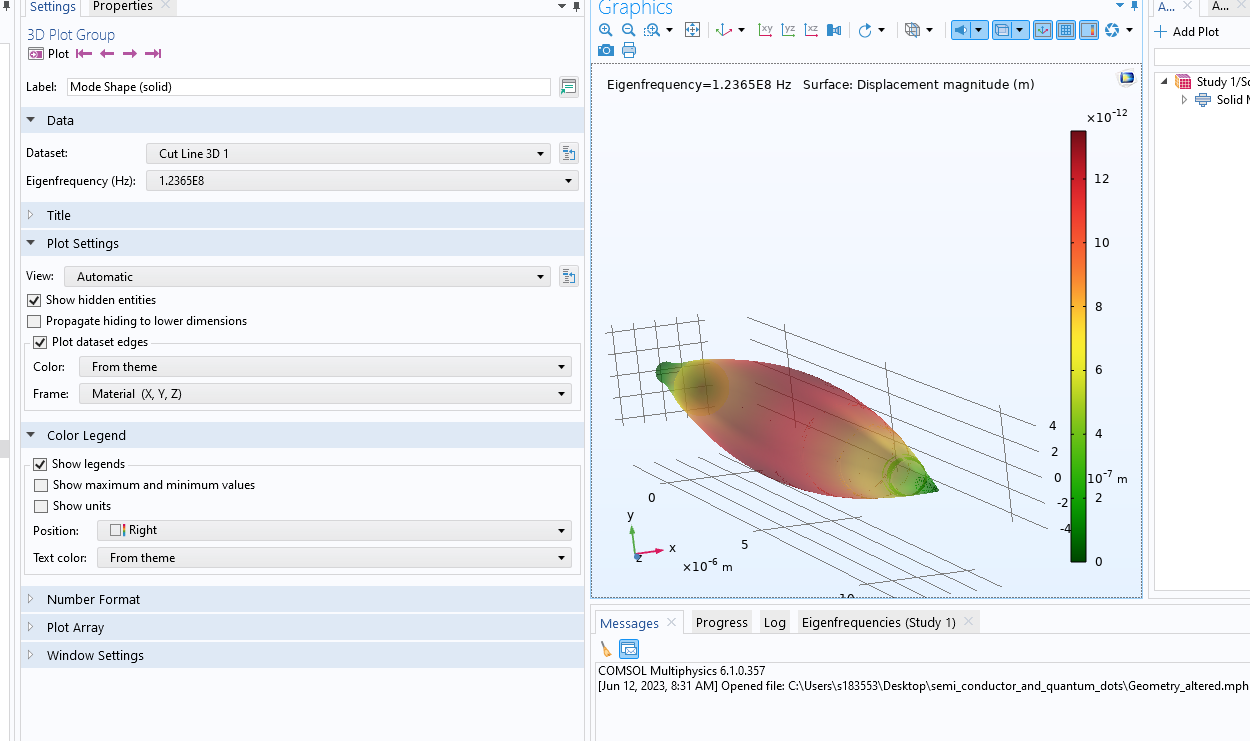
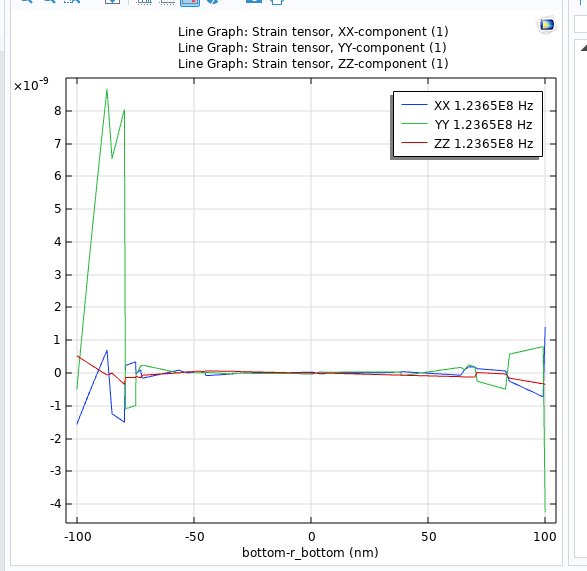
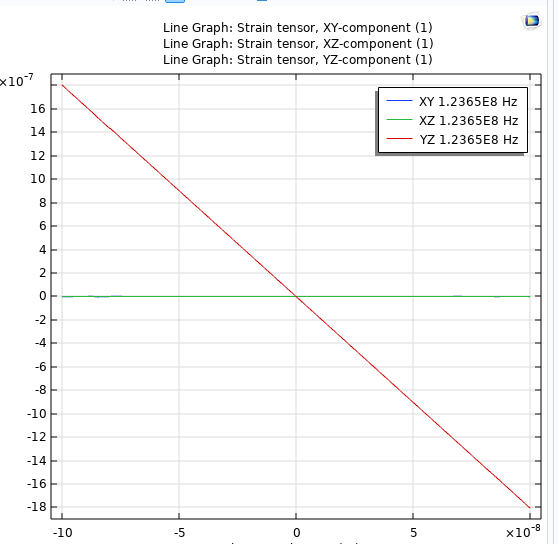




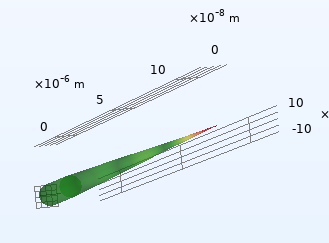
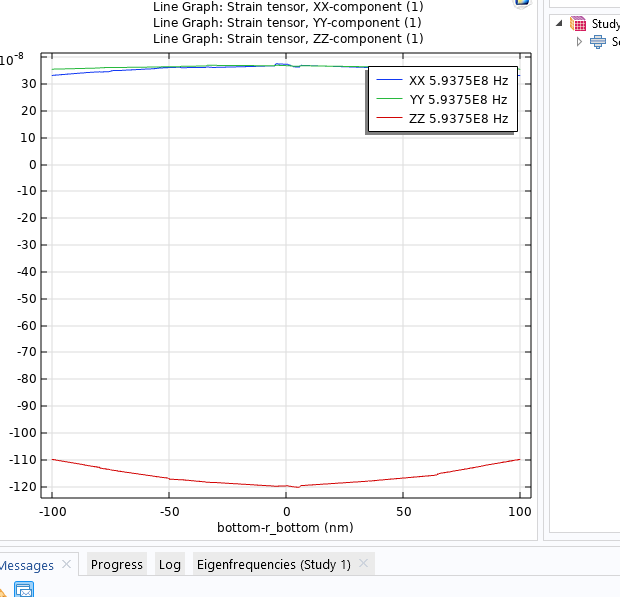
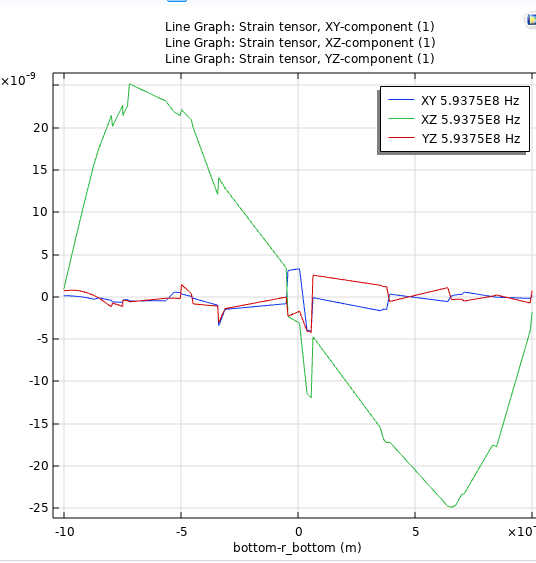

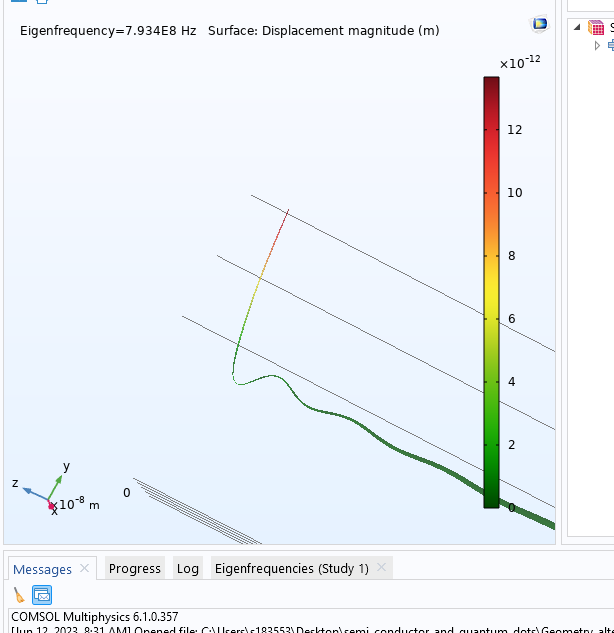
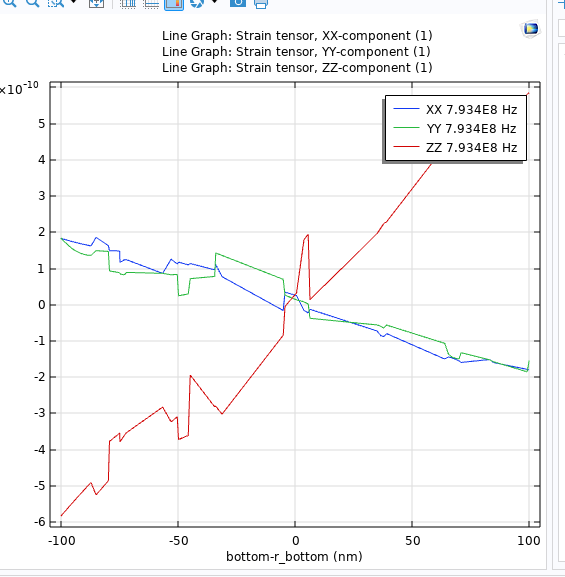
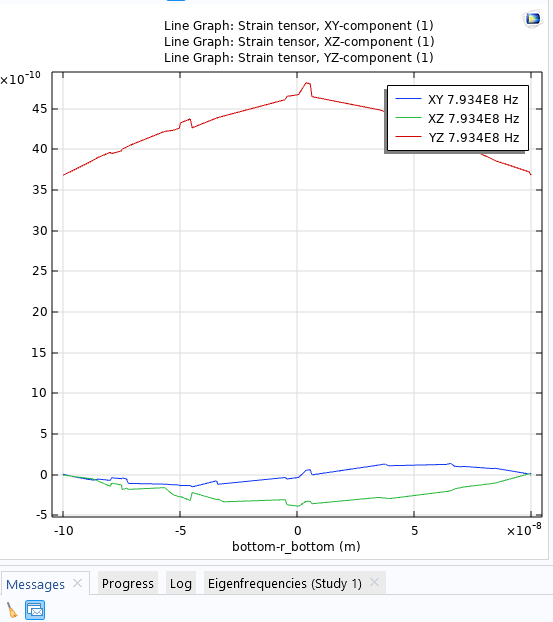
